# Notebook to show pytorch logiscal regression
## The First step is to make our data

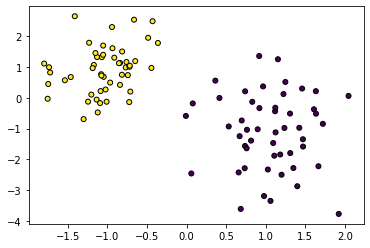

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=8, 
                           n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k") #plots the dataset
plt.show() # shows the dataset



## The next step will be to define the model with the structure shown in the image below
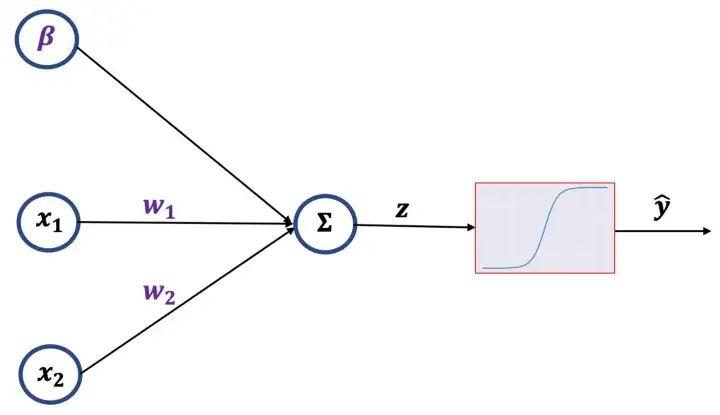

Z = x1 * w1 + x2 * w2 + b

y_hat = sigmoid(Z)

In [2]:
import torch
import torch.nn as nn 

class LogisticRegression(nn.Module):
     def __init__(self, input_dim, output_dim):
         super(LogisticRegression, self).__init__()
         self.linear = nn.Linear(2, 1) # input is 2 for x1 and x2 output is 1 for y_hat
     def forward(self, x):
         outputs = torch.sigmoid(self.linear(x)) # use the sigmoid function 
         return outputs

## now with our model defined we now set up some parameters for the network, prep the data, and initialize the model

In [3]:
from sklearn.model_selection import train_test_split

epochs = 10000 # how many times the model will train
input_dim = 2 # Two inputs x1 and x2 
output_dim = 1 # Single binary output 
learning_rate = 0.01 # The size of each step while moving towards the minimum value of the loss function 

# We will also prepare our data by spliting into training and testing data
# Normally you need to split data into train and test but for this example we will do it but not worry about it
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% training 25% testing data
# We then have to convert our data into tensors for pytorch to be able to work with it
X_train_tensor = torch.Tensor(X)
y_train_tensor = torch.Tensor(y)
y_train_tensor = y_train_tensor.unsqueeze(1)

# init the model
model = LogisticRegression(input_dim,output_dim)
# pick whick loss function we want 
criterion = torch.nn.BCELoss() # Binary cross entropy (The one you use for binary classication)
# SGD = stochastic gradient descent 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


## Now we are ready to try and run the model

Training network: 100%|██████████| 10000/10000 [00:02<00:00, 4527.05it/s]


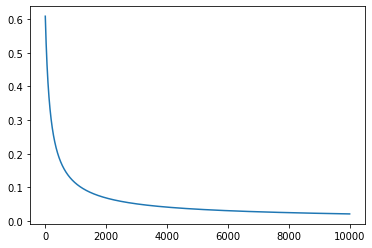

In [4]:
from tqdm import tqdm
import numpy as np

losses = []

for epoch in tqdm(range(10000), desc='Training network'):
    optimizer.zero_grad() # set our gradients to zero
    network_output = model(X_train_tensor)
    loss = criterion(network_output, y_train_tensor)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()

plt.plot(losses)
plt.show()

## The loss looks pretty good! Now lets see how the model did with making its Decision on where to classify!

### We will be looking at the testing data set so the model has not been trained on this data

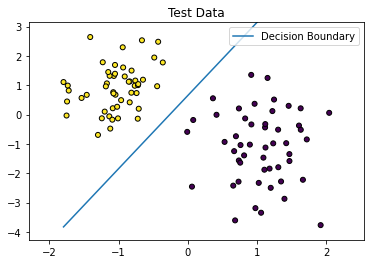

In [5]:
def model_plot(model,X,y,title):
    parm = {}
    b = []
    for name, param in model.named_parameters():
        parm[name]=param.detach().numpy()  
    
    w = parm['linear.weight'][0]
    b = parm['linear.bias'][0]
    
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k") #plots the dataset
    u = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
    plt.plot(u, (0.5-b-w[0]*u)/w[1],label='Decision Boundary')
    plt.xlim(X[:, 0].min()-0.5, X[:, 0].max()+0.5)
    plt.ylim(X[:, 1].min()-0.5, X[:, 1].max()+0.5)

    plt.title(title)
    plt.legend()
    plt.show()

model_plot(model,X,y,'decision_boundary')
